In [2]:
import tensorflow as tf
import numpy as np

X = []
Y = []

for i in range(3000):
  # 0 ~ 1 범위의 랜덤한 숫자 100개를 만듭니다.
  lst = np.random.rand(100)

  # 마킹할 숫자 2개의 인덱스를 뽑습니다.
  idx = np.random.choice(100, 2, replace = False)
  
  # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
  zeros = np.zeros(100)
  zeros[idx] = 1

  # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장합니다.
  X.append(np.array(list(zip(zeros, lst))))

  # 마킹 인덱스가 1인 값만 서로 곱해서 Y에 저장합니다.
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.12227751]
 [0.         0.66349993]
 [0.         0.10600637]
 [0.         0.78791792]
 [0.         0.18395198]
 [0.         0.49826885]
 [0.         0.25742512]
 [0.         0.5238619 ]
 [0.         0.26528095]
 [0.         0.32222993]
 [0.         0.33515402]
 [0.         0.5527128 ]
 [0.         0.44097548]
 [0.         0.98048851]
 [0.         0.20632807]
 [0.         0.92379715]
 [0.         0.25146336]
 [0.         0.1309099 ]
 [0.         0.95153313]
 [0.         0.72081145]
 [0.         0.458978  ]
 [0.         0.95338906]
 [0.         0.67884412]
 [0.         0.11381797]
 [0.         0.8481048 ]
 [0.         0.83909693]
 [0.         0.58241225]
 [0.         0.88913481]
 [0.         0.41816518]
 [0.         0.88431063]
 [0.         0.3253161 ]
 [0.         0.27980305]
 [0.         0.47565211]
 [0.         0.26375358]
 [0.         0.1955239 ]
 [0.         0.11118975]
 [0.         0.01037343]
 [0.         0.58274887]
 [0.         0.99534044]
 [0.         0.42902746]


In [1]:
# 예제 7.15 : GRU 레이어를 이용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
                             tf.keras.layers.GRU(units = 30, return_sequences = True, input_shape = [100, 2]),
                             tf.keras.layers.GRU(units = 30),
                             tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 예제 7.16 : GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[: 2560], Y[: 2560], epochs = 100, validation_split = 0.2)

Epoch 1/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0531 - val_loss: 0.0565
Epoch 2/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0510 - val_loss: 0.0563
Epoch 3/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0507 - val_loss: 0.0577
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0512 - val_loss: 0.0567
Epoch 5/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0505 - val_loss: 0.0562
Epoch 6/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0508 - val_loss: 0.0561
Epoch 7/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0506 - val_loss: 0.0573
Epoch 8/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0509 - val_loss: 0.0560
Epoch 9/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0508 - val_loss: 0.0560
Epoch 10/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0507 - val_loss: 0.0561

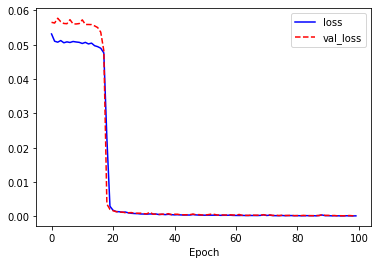

In [4]:
# 예제 7.17 : GRU 네트워크의 학습 결과 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [7]:
# 예제 7.18 : 테스트 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560 :], Y[2560 :])
prediction = model.predict(X[2560 : 2560 + 5])

for i in range(5):
  print(Y[2560 + i], '\t', prediction[i][0], '\tdiff', abs(prediction[i][0] - Y[2560 + i]))

prediction = model.predict(X[2560 :])
cnt = 0

for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560 + i]) > 0.04:
    cnt += 1

print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 5ms/step - loss: 2.6152e-04
0.20773870194822278 	 0.20420301 	diff 0.003535692342815061
0.30296292219475635 	 0.2918877 	diff 0.011075221637047605
0.12229749991381507 	 0.13077615 	diff 0.008478652100917292
0.5890254019001319 	 0.61266583 	diff 0.02364043014256223
0.008435697759728324 	 0.008502409 	diff 6.67111023856283e-05
correctness: 97.95454545454545 %
